In [2]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math


class Vect:

   def __init__(self, a, b):
        self.a = a
        self.b = b

   def findClockwiseAngle(self, other):
       # using cross-product formula
       return -math.degrees(math.asin((self.a * other.b - self.b * other.a)/(self.length()*other.length())))
       # the dot-product formula, left here just for comparison (does not return angles in the desired range)
       # return math.degrees(math.acos((self.a * other.a + self.b * other.b)/(self.length()*other.length())))

   def length(self):
       return math.sqrt(self.a**2 + self.b**2)

def calc_order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))
out_str = "/home/lars/vmodel_output/relax_100_Nocol_occ/"
saveLoc = "/home/lars/vmodel_output/"
saveName = "test_relax100_NoCol_occ"



args = {
'nprey': 100,
'npred': 1,
'frange': 10,
'fstr': 50.0,
'visPred': 300.0,
'visPrey': 330,
'astr': 3,
'dphi': 0.2,
'repPrey': 3,
'repRadPrey': 1.5,
'repPred': 21,  
'repRadPred': 20,
'attPrey': 3,
'attRadPrey': 1.5,
'repCol': 10000000,
'hstr': 1,
'steps': 4000,
    }

In [14]:
paraChange1_name = "fangle"
paraChange2_name = "pangle"
steps = 20 #10
reps = 1 #20
pred_time = 1200

total = steps*steps*reps

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

paraChange1_val = [30.0]
paraChange2_val = [0] #,90,180]


mindist_hm = []

time_now = datetime.datetime.now()
time_elapsed = 0


for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):

        #np.savetxt(str(saveLoc)+""+str(saveName)+"pol_"+str(paraChange1_name)+"_"+str(paraChange2_name)+".csv", pol_scan, delimiter=",")
  
        #pol_reps = np.zeros((reps, args["steps"]))
        IID_reps = []
        CND_reps = []
        
        args[paraChange1_name] = paraChange1_val[i]
        args[paraChange2_name] = paraChange2_val[j]

        npred = args["npred"]
        nprey = args["nprey"]

        args_str = '_'.join(f'{k}_{v}' for k, v in args.items())

        file_h5 = f'{out_str}_{args_str}.states.nc'
        #file_h5 = f'/extra2/knopf/vmodel_output/longsim/_nprey_100_npred_1_frange_10_fstr_0.0_visPred_300.0_visPrey_330_astr_1.6666666666666665_dphi_0.1111111111111111_repPrey_3_repRadPrey_1.5_repPred_21_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_20000.states.nc'

        print(file_h5)
        


        try:
            with h5py.File(file_h5) as fh5:
                vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[:,:,:,:]
                pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[:,:,:,:]

        except:
            print("File not Found, going on")
        
        
        mindist_full = []
        for rep in range(reps):
            
            print(rep)
            
            vel_rep = vel[rep,:,:nprey,:]
            pos_rep = pos[rep,:,:nprey,:]
            pospred_rep = pos[rep,:,nprey:,:]


            time, N, dim = np.shape(pos_rep)
            
            mindist = []
            for ii in range(time-2):

                dist_full = scipy.spatial.distance.cdist(pos_rep[ii+2,:,:],pospred_rep[ii+2,:,:])
                mindist.append(np.min(dist_full))

            mindist_full.append(np.min(mindist))
        mindist_hm.append(mindist_full)
                

                
                
            

            
            
        time_last = time_now
            
        time_now = datetime.datetime.now()
            
        time_diff = np.round((time_now-time_last).total_seconds(),2)
            
        time_elapsed += time_diff

        progress = rep+reps*(j+i*steps)
            
        time_finish = (time_elapsed/progress) * (total - progress)
            
        print("progress: "+str(np.round(100*progress/total,2))+" %, time running: "+str(np.round(time_elapsed,2))+" s, est. finish: "+str(np.round(time_finish/60,2))+" min.")
            
            
        

            
        
#np.save(str(saveLoc)+""+str(saveName)+"_mill_"+str(paraChange1_name)+"_"+str(paraChange2_name), mil_scan)
np.save(str(saveLoc)+""+str(saveName)+"_MPD_"+str(paraChange1_name)+"_"+str(paraChange2_name), mindist_hm)
#np.savetxt(str(saveLoc)+""+str(saveName)+"IID_"+str(paraChange1_name)+"_"+str(paraChange2_name)+".csv", IID_scan, delimiter=",")
#np.savetxt(str(saveLoc)+""+str(saveName)+"CND_"+str(paraChange1_name)+"_"+str(paraChange2_name)+".csv", CND_scan, delimiter=",")
 

/home/lars/vmodel_output/relax_100_Nocol_occ/_nprey_100_npred_1_frange_10_fstr_50.0_visPred_300.0_visPrey_330_astr_3_dphi_0.2_repPrey_3_repRadPrey_1.5_repPred_21_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_4000_fangle_30.0_pangle_0.states.nc
0
progress: 0.0 %, time running: 6.47 s, est. finish: inf min.


/tmp/ipykernel_177891/4068787482.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  time_finish = (time_elapsed/progress) * (total - progress)


In [47]:
np.argwhere(np.array(mindist) <= 1)
#print(len(mindist))

array([[1116],
       [1117],
       [1118],
       [1119],
       [1120],
       [1121],
       [1122],
       [1123],
       [1124],
       [1125],
       [1126],
       [1127],
       [1128],
       [1129],
       [1130],
       [1131],
       [1132],
       [1133],
       [1134],
       [1135],
       [1136],
       [1137],
       [1138],
       [1139]])

In [44]:
np.argwhere(testdat <= 2)

array([[60,  0],
       [93,  0]])

In [42]:
testdat

array([[ 3.87121417],
       [ 3.8671456 ],
       [ 5.67177171],
       [ 4.80316901],
       [ 5.71168881],
       [ 6.94355711],
       [ 5.72359123],
       [12.32531785],
       [11.06900967],
       [ 2.03527087],
       [ 9.55061802],
       [ 5.65374067],
       [ 7.00947791],
       [ 9.84168847],
       [ 4.24207324],
       [ 3.48265397],
       [ 9.18031405],
       [ 5.92189354],
       [ 7.75419351],
       [12.27263888],
       [ 3.72518862],
       [ 5.71942607],
       [ 6.818735  ],
       [ 3.14051884],
       [ 2.90537373],
       [ 6.21890581],
       [ 4.20540098],
       [ 4.28856167],
       [ 2.03393886],
       [ 4.12594527],
       [ 5.79634101],
       [ 9.47111147],
       [ 7.79158217],
       [ 7.40959847],
       [ 4.91727758],
       [ 2.53931282],
       [ 2.80277139],
       [ 4.00717575],
       [11.15743496],
       [10.86855607],
       [ 4.32520672],
       [ 4.48345113],
       [ 7.85704072],
       [ 5.30692803],
       [ 8.13743751],
       [10

In [40]:
testdat = scipy.spatial.distance.cdist(pos_rep[1128,:,:],pospred_rep[1128,:,:])

In [6]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
import glob
sys.path.insert(1, '/home/lars/predatorprey-1/predprey-staticnw/')
from animateSwarm import AnimateTools as at
#from TsTools import general as gen
from pathlib import Path
import pickle
from functools import partial
from vmodel import geometry as vgeom
from vmodel import plot
from vmodel.util import color as vcolor
import math

def filter_front_target(pos, vel, target):
    vel_self = vel[target]
    pos_self = pos[target]
    pos = np.delete(pos, target, axis=0)
    pos = pos - pos_self
    
    
    
    
    out_idx = []
    for i in range(len(pos)):
        
        ort_pv = [0,0]
        ort_pv[0] = -vel_self[1]
        ort_pv[1] = vel_self[0]
        
        r_pi = np.array(pos[i])
        if (-r_pi[0] * ort_pv[1] + r_pi[1] * ort_pv[0] < 0):
            out_idx.append(i)
            
    return out_idx
        
def pavas2colors(pavas):
    if np.std(pavas) > 1e-5:
        colors = np.squeeze(pavas)
        colors -= colors.min()
        colors /= colors.max()
    else:
        colors = 'k'
    return colors




#file_h5 = str(file)+".h5"
#file_dat = str(file)+".dat"



mode = 'gif' # 'normal', 'pictures', 'movie', 'gif'
fps = 60
dpi = 200
NsamShow = 4
sizePrey = 1/4
sizePred = sizePrey * 2
cmap = plt.get_cmap('coolwarm') # alternatives 'bwr', 'Reds'


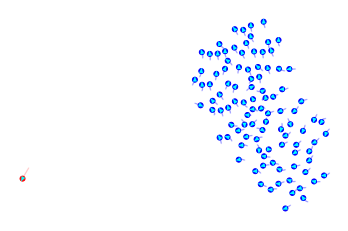

In [13]:
    run = 0
    pos = pos[run,:,:101,:]
    vel = vel[run,:,:101,:]
    lines = pos[:,:,:]
    lines = pos
    linesDat = at.datCollector( lines )
    posDat = at.datCollector( pos )
    velDat = at.datCollector( vel )
    positions = [posDat]
    velocities = [velDat]

    posDat.tail_length = 20
    posDat.radius = .25

    # comment line below for colors representing alignment strength
    colors = 'k'
    # get info from files
    time, N, _ = posDat.dat.shape 


#
    f, ax = plt.subplots(1)
    ax.axis('off')
    ax.set_aspect('equal')
    # Collect update-tasks
    #preds.colors = "r"
    #posDat.colors = "b"
    tasks = at.taskCollector()

    #tasks.append( at.plot_nselect_visual(ax, pos, vel, vis, nprey, npred, pred_visangle))
    #tasks.append( at.vision_cones(ax, pos, vel, npred, nprey, pred_visangle))
    tasks.append( at.color_front(pos, vel, posDat, npred, nprey))
    #tasks.append( at.color_vis(pos, vel, posDat, vis_pred, nprey))
    tasks.append( at.Limits4Pos(positions, ax) )
    tasks.append( at.headAndTail(posDat, ax))
    tasks.append( at.movingArrows(posDat, ax, color = "cyan", noShaft = True))
    #tasks.append( at.lineFadingCOM(posDat, ax))



    # animation
    interval = 1000*(1/fps) # interval in ms
    anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                                   frames=range(0-1, time), repeat=True)


    #plt.show()
    anim.save("test" + '.mp4', writer='ffmpeg', dpi=dpi, bitrate=-1, codec='libx264')